<a href="https://colab.research.google.com/github/mmoh-i/HamoyeStageE/blob/main/FbProphetTimeSeries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [154]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv("https://github.com/HamoyeHQ/HDSC-Time-series-analysis-and-forecast/files/7768846/Time_series_analysis_and_forecast_DATASET.csv", parse_dates=[0], delimiter=",")
df.head()


,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
1,2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2,2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
3,2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
4,2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92016 entries, 0 to 92015
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   FullDate   92016 non-null  datetime64[ns]
 1   Tmax       92016 non-null  float64       
 2   SysLoad    92016 non-null  float64       
 3   GasPrice   92016 non-null  float64       
 4   ElecPrice  92016 non-null  float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 3.5 MB


In [156]:
print(f"null values:{df.isna().sum()}")
print(f"Shape of data: {df.shape}")

null values:FullDate     0
Tmax         0
SysLoad      0
GasPrice     0
ElecPrice    0
dtype: int64
Shape of data: (92016, 5)


In [157]:
monthly_data = df.set_index('FullDate', inplace=True)
#resampling data by month
monthly_data= df.resample('M').mean()


In [158]:
monthly_data

,Tmax,SysLoad,GasPrice,ElecPrice
FullDate,,,,
2010-09-30,16.906667,1578.145819,3.578663,25.075896
2010-10-31,21.377419,1398.027708,2.799987,22.223629
2010-11-30,24.323333,1484.759104,2.321943,22.575944
2010-12-31,26.696774,1082.167586,2.401429,17.585753
2011-01-31,30.629032,1331.477822,2.917977,103.094603
...,...,...,...,...
2020-10-31,21.374194,123.116935,5.571003,32.966606
2020-11-30,27.986667,20.694651,6.032180,36.725250
2020-12-31,25.525806,-47.401751,6.333106,16.788972


array([<Axes: xlabel='FullDate'>, <Axes: xlabel='FullDate'>,
       <Axes: xlabel='FullDate'>, <Axes: xlabel='FullDate'>], dtype=object)

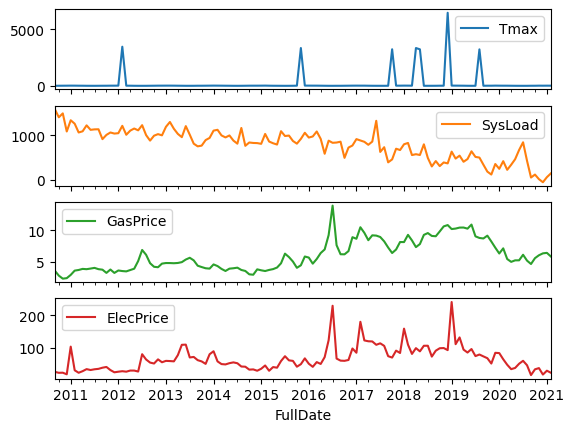

In [159]:
monthly_data.plot(subplots=True)

In [160]:
# cols = ['Tmax', 'SysLoad', 'GasPrice', 'ElecPrice']
# for i in cols:
#   plt.subplot(3, 1, 1)
#   #plt.plot(monthly_data.index, df[i])
#   plt.plot(monthly_data.index, monthly_data[i])

#   plt.subplot(3, 1, 2)
#   plt.plot(monthly_data.index, monthly_data[i])

#   plt.subplot(3, 1, 3)
#   plt.plot(monthly_data.index, monthly_data[i])

#   plt.show()

In [161]:
# #converting FullDate to dateTime
# df['FullDate'] = pd.to_datetime(df['FullDate'])

# #downsampling
# monthly_data = df.resample('M', on='FullDate').sum()

# plt.figure(figsize=(10, 6))
# plt.plot(monthly_data['FullDate'], monthly_data.ElecPrice, marker='*')
# plt.xlabel('Year')
# plt.ylabel('Electricity Price')


In [162]:
# # installing facebook prophet
# !pip install pystan~=2.14
# !pip install fbprophet


In [163]:
#modeling
from fbprophet import Prophet


In [164]:
df

,Tmax,SysLoad,GasPrice,ElecPrice
FullDate,,,,
2010-09-01 00:00:00,15.8,1688.21500,3.6900,23.710
2010-09-01 01:00:00,15.8,1669.19500,3.6900,22.635
2010-09-01 02:00:00,15.8,1491.98000,3.6900,22.565
2010-09-01 03:00:00,15.8,1330.76000,3.6900,18.910
2010-09-01 04:00:00,15.8,1247.94000,3.6900,18.030
...,...,...,...,...
2021-02-28 19:00:00,24.3,449.63625,5.4848,117.925
2021-02-28 20:00:00,24.3,815.59975,5.4848,87.880
2021-02-28 21:00:00,24.3,745.12325,5.4848,62.060


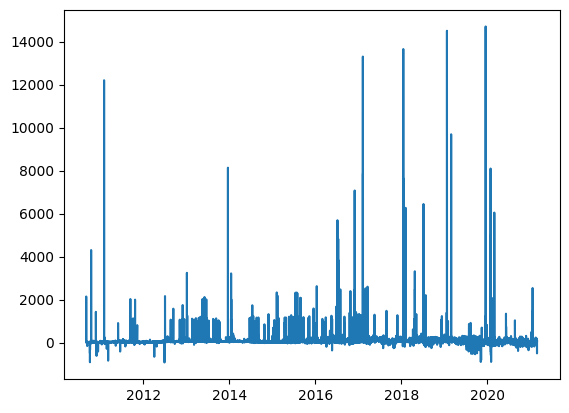

/usr/local/lib/python3.9/dist-packages/pandas/core/internals/blocks.py:402: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
/usr/local/lib/python3.9/dist-packages/pandas/core/internals/blocks.py:402: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


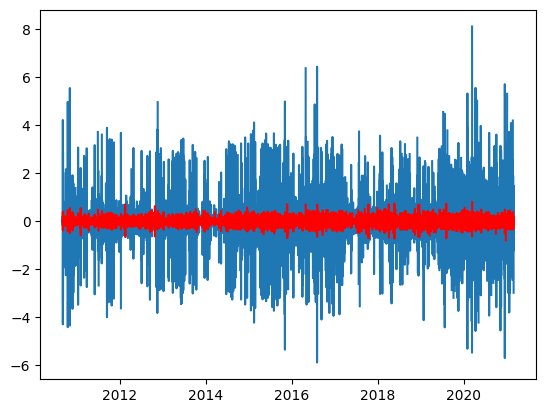

In [165]:
#df.resample('M').mean()
plt.plot(df.index, df['ElecPrice'])
plt.show()

#smoothening Seasonality
df_log = np.log(df)
df_diff = df_log.diff(periods=1)
plt.plot(df_diff.index, df_diff.ElecPrice, '-')
plt.plot(df_diff.rolling(12).mean(), color='red')

In [166]:
df = df.reset_index()
df

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01 00:00:00,15.8,1688.21500,3.6900,23.710
1,2010-09-01 01:00:00,15.8,1669.19500,3.6900,22.635
2,2010-09-01 02:00:00,15.8,1491.98000,3.6900,22.565
3,2010-09-01 03:00:00,15.8,1330.76000,3.6900,18.910
4,2010-09-01 04:00:00,15.8,1247.94000,3.6900,18.030
...,...,...,...,...,...
92011,2021-02-28 19:00:00,24.3,449.63625,5.4848,117.925
92012,2021-02-28 20:00:00,24.3,815.59975,5.4848,87.880
92013,2021-02-28 21:00:00,24.3,745.12325,5.4848,62.060
92014,2021-02-28 22:00:00,24.3,694.95150,5.4848,62.000


In [167]:
print(f"starting date: {str(df['FullDate'].dt.date.min())}")
print(f"end date: {str(df['FullDate'].dt.date.max())}")

starting date: 2010-09-01
end date: 2021-02-28


In [168]:
data = df[['FullDate', 'ElecPrice']]
data.rename(columns= {'FullDate':'ds', 'ElecPrice':'y'}, inplace=True)
data

<ipython-input-168-5f407e4dfff1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.rename(columns= {'FullDate':'ds', 'ElecPrice':'y'}, inplace=True)


,ds,y
0,2010-09-01 00:00:00,23.710
1,2010-09-01 01:00:00,22.635
2,2010-09-01 02:00:00,22.565
3,2010-09-01 03:00:00,18.910
4,2010-09-01 04:00:00,18.030
...,...,...
92011,2021-02-28 19:00:00,117.925
92012,2021-02-28 20:00:00,87.880
92013,2021-02-28 21:00:00,62.060
92014,2021-02-28 22:00:00,62.000


In [169]:
#splitting the data
from sklearn.model_selection import train_test_split
train_data = data[:2757]
test_data = data[df.shape[0] - len(train_data):]

In [170]:
#modelling with FacebookProphet
# X = train_data['ds']
# y = train_data['y']
model = Prophet()
model.fit(train_data)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


In [171]:
#evaluating model
from sklearn.metrics import mean_absolute_error
validation_train_data = train_data.reset_index(drop=True)
prediction = model.predict(pd.DataFrame({'ds':validation_train_data['ds']}))
y_actual = validation_train_data['y']
y_pred = prediction['yhat']
y_pred = y_pred.astype(int)
mean_absolute_error(y_actual, y_pred)

/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


14.150409865796155

/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


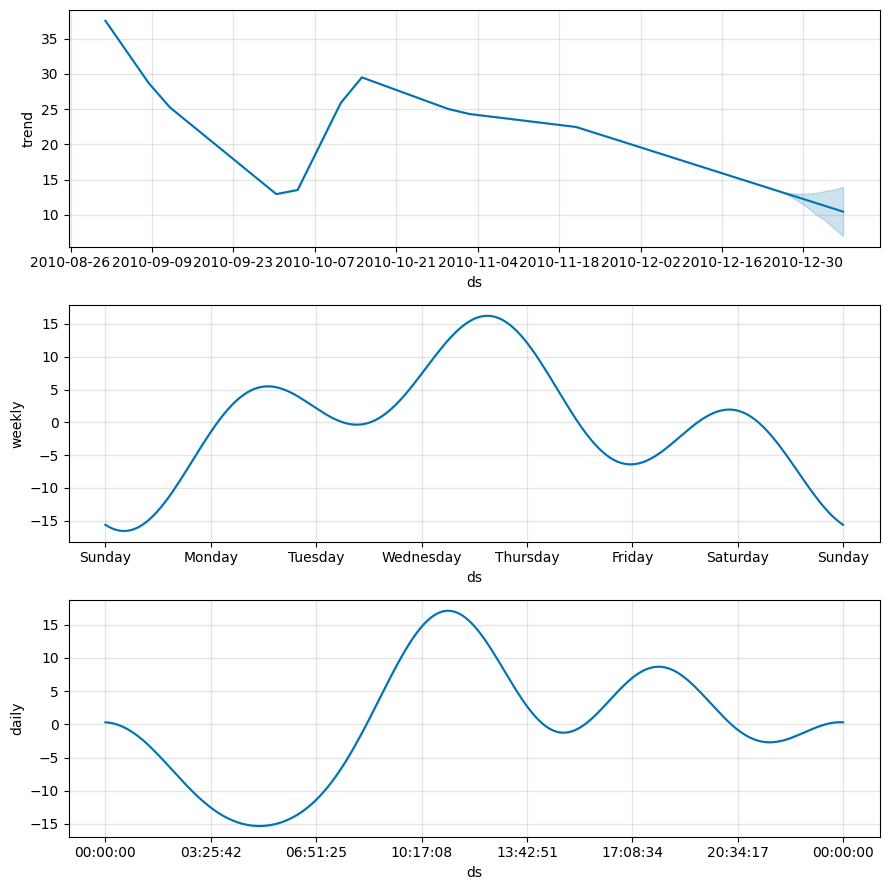

In [172]:
train_future = model.make_future_dataframe(periods=12)
forecast = model.predict(train_future)
forecast.head()
model.plot_components(forecast)
plt.show()

In [173]:
train_data.max()

ds    2010-12-24 20:00:00
y                4303.245
dtype: object

In [174]:
forecast.min()

ds                            2010-09-01 00:00:00
trend                                   10.462346
yhat_lower                            -156.007299
yhat_upper                             101.657602
trend_lower                              7.011578
trend_upper                             12.955183
additive_terms                         -31.838581
additive_terms_lower                   -31.838581
additive_terms_upper                   -31.838581
daily                                  -15.308869
daily_lower                            -15.308869
daily_upper                            -15.308869
weekly                                 -16.559132
weekly_lower                           -16.559132
weekly_upper                           -16.559132
multiplicative_terms                          0.0
multiplicative_terms_lower                    0.0
multiplicative_terms_upper                    0.0
yhat                                   -18.432928
dtype: object

In [175]:
#using the test data
test_data.head()
test_d = test_data.copy()
test_d.drop('y', axis=1, inplace=True)
test_d

,ds
89259,2020-11-06 03:00:00
89260,2020-11-06 04:00:00
89261,2020-11-06 05:00:00
89262,2020-11-06 06:00:00
89263,2020-11-06 07:00:00
...,...
92011,2021-02-28 19:00:00
92012,2021-02-28 20:00:00
92013,2021-02-28 21:00:00
92014,2021-02-28 22:00:00


In [176]:
test_d.reset_index(inplace=True)
test_pred = model.predict(pd.DataFrame({'ds':test_d['ds']}))
test_pred = test_pred.astype(int)
test_d['y'] = test_pred['yhat']
print(f"mae for test data: {mean_absolute_error(test_data['y'], test_d['y'])}")

/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


mae for test data: 970.8943761334784


In [177]:
#adding regressors
df.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
1,2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2,2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
3,2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
4,2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


In [178]:

df2 = df[['Tmax', 'SysLoad', 'GasPrice']]
df2.rename(columns={'Tmax': 'add1', 'SysLoad': 'add2', 'GasPrice': 'add3'}, inplace=True)
df2

<ipython-input-178-49955d35fe48>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.rename(columns={'Tmax': 'add1', 'SysLoad': 'add2', 'GasPrice': 'add3'}, inplace=True)


,add1,add2,add3
0,15.8,1688.21500,3.6900
1,15.8,1669.19500,3.6900
2,15.8,1491.98000,3.6900
3,15.8,1330.76000,3.6900
4,15.8,1247.94000,3.6900
...,...,...,...
92011,24.3,449.63625,5.4848
92012,24.3,815.59975,5.4848
92013,24.3,745.12325,5.4848
92014,24.3,694.95150,5.4848


In [179]:
regressor_data = pd.concat([data, df2], axis=1)
regressor_data.head()


,ds,y,add1,add2,add3
0,2010-09-01 00:00:00,23.710,15.8,1688.215,3.69
1,2010-09-01 01:00:00,22.635,15.8,1669.195,3.69
2,2010-09-01 02:00:00,22.565,15.8,1491.980,3.69
3,2010-09-01 03:00:00,18.910,15.8,1330.760,3.69
4,2010-09-01 04:00:00,18.030,15.8,1247.940,3.69


In [180]:
regressor_data.columns

Index(['ds', 'y', 'add1', 'add2', 'add3'], dtype='object')

In [181]:
regressor_dm = Prophet()

In [182]:
#adding regressor of df2
print(f"shape: {regressor_data.shape}")

shape: (92016, 5)


In [183]:
from sklearn.metrics import  mean_absolute_percentage_error
#SPLITTING the datas
regre_train = regressor_data[:2757]
regre_test = regressor_data[len(regressor_data) - 2757 :]

model = Prophet()
model.fit(regre_train)
reg_validation = model.predict(pd.DataFrame({'ds':regre_train['ds']}))
reg_validation= reg_validation['yhat']
reg_validation = reg_validation.astype(int)
reg_val_pred = reg_validation
print(f"mea for add_reegressor train: {mean_absolute_percentage_error(regre_train['y'], reg_val_pred)}")



INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


mea for add_reegressor train: 0.6233611097370775


In [184]:
reg_validation.head(), regre_train['y'].head()

(0    45
 1    44
 2    40
 3    36
 4    34
 Name: yhat, dtype: int64,
 0    23.710
 1    22.635
 2    22.565
 3    18.910
 4    18.030
 Name: y, dtype: float64)

In [185]:
future['add1'] = regre_train['add1']
future

,add1,add2,add2
0,15.8,1688.21500,1688.21500
1,15.8,1669.19500,1669.19500
2,15.8,1491.98000,1491.98000
3,15.8,1330.76000,1330.76000
4,15.8,1247.94000,1247.94000
...,...,...,...
2752,33.3,1799.49565,1799.49565
2753,33.3,1869.43815,1869.43815
2754,33.3,1836.26230,1836.26230
2755,33.3,1716.70845,1716.70845


In [192]:
#adding regressors
regre_train =regre_train.copy()
regre_train.drop(['ds', 'y'], axis=1)
m = Prophet()
m.add_regressor('add1')
m.add_regressor('add2')
m.add_regressor('add3')

m.fit(regre_train)
#future forcast prediction

future = m.make_future_dataframe(periods=12)
future= pd.concat([regre_train['ds'],regre_train['add1'], regre_train['add2'],regre_train['add2']], axis=1)


forecast = m.predict(future)
m.plot_components(forecast)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


TypeError: ignored

In [193]:
future

,ds,add1,add2,add2
0,2010-09-01 00:00:00,15.8,1688.21500,1688.21500
1,2010-09-01 01:00:00,15.8,1669.19500,1669.19500
2,2010-09-01 02:00:00,15.8,1491.98000,1491.98000
3,2010-09-01 03:00:00,15.8,1330.76000,1330.76000
4,2010-09-01 04:00:00,15.8,1247.94000,1247.94000
...,...,...,...,...
2752,2010-12-24 16:00:00,33.3,1799.49565,1799.49565
2753,2010-12-24 17:00:00,33.3,1869.43815,1869.43815
2754,2010-12-24 18:00:00,33.3,1836.26230,1836.26230
2755,2010-12-24 19:00:00,33.3,1716.70845,1716.70845
